In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data to variables

In [58]:
data = pd.read_csv('Position_Salaries.csv')

In [59]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [60]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [61]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [62]:
y = y.reshape(len(y),1)

In [63]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling


In [64]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [65]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [66]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Creating a model

In [67]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y.ravel())

SVR()

## Predicting

In [68]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
print(y_pred)

[170370.0204065]


## Visualization

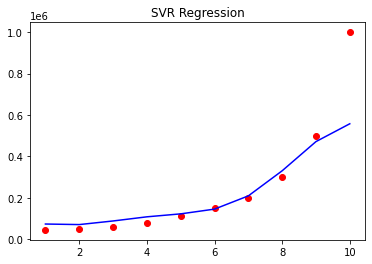

In [72]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)) , color='blue')
plt.title('SVR Regression')
plt.show()

## Visualization(better resolution)

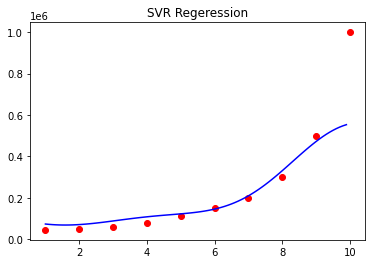

In [77]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.title("SVR Regeression")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')